In [1]:
!pip install openpyxl

In [2]:
# 액셀 파일 데이터프레임으로 불러오기

import pandas as pd
import os

dfdict = dict()

for filename in os.listdir('./'):
    if filename.endswith('.xlsx'):
        print(filename)
        dfdict[filename] = pd.read_excel(filename)


corpus_preprocessed_02.xlsx
corpus_preprocessed_01.xlsx


In [3]:
for df in dfdict.values():
    print(df.columns)

Index(['Unnamed: 0', 'src', 'tgt'], dtype='object')
Index(['Unnamed: 0', 'src', 'tgt'], dtype='object')


In [4]:
for df in dfdict.values():
    print(df.head())

   Unnamed: 0                                                src  \
0      197978  농업 산림 분야에는 임산물 가공 유통 단지 조성 억원 , 임산물 수출특화단지 육성 ...   
1      197979  사절단은 김현종 통상교섭본부장을 대표로 외교부 , 기재부 등 관계부처와 자동차산업협...   
2      197980  새누리당과 더불어민주당 등 여당 텃밭 에서 무소속으로 선에 성공한 오규석 기장군수는...   
3      197981  현재 포항에는 공동연구단 외에도 포항지진범시민대책본부 , 지열발전과 포항지진 진상규...   
4      197982  고려대는 중소벤처기업부가 주관하는 초기창업패키지 사업으로 개월간 총 억 , 만원 ,...   

                                                 tgt  
0  <start> in the agricultural and forest sectors...  
1  <start> the delegation was headed by the direc...  
2  <start> gijang county governor , oh kyu seok ,...  
3  <start> currently , in addition to the joint r...  
4  <start> korea university announced on the that...  
   Unnamed: 0                                                src  \
0           0  bible coloring 은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱...   
1           1                                      씨티은행에서 일하세요 ?   
2           2              푸리토의 베스트셀러는 해외에서 입소문만으로 차 완판을 

In [5]:
df_total = pd.concat(list(dfdict.values()))[['src', 'tgt']]
df_total.reset_index(drop=True, inplace=True)
df_total.head()

,src,tgt
0,"농업 산림 분야에는 임산물 가공 유통 단지 조성 억원 , 임산물 수출특화단지 육성 ...",<start> in the agricultural and forest sectors...
1,"사절단은 김현종 통상교섭본부장을 대표로 외교부 , 기재부 등 관계부처와 자동차산업협...",<start> the delegation was headed by the direc...
2,새누리당과 더불어민주당 등 여당 텃밭 에서 무소속으로 선에 성공한 오규석 기장군수는...,"<start> gijang county governor , oh kyu seok ,..."
3,"현재 포항에는 공동연구단 외에도 포항지진범시민대책본부 , 지열발전과 포항지진 진상규...","<start> currently , in addition to the joint r..."
4,"고려대는 중소벤처기업부가 주관하는 초기창업패키지 사업으로 개월간 총 억 , 만원 ,...",<start> korea university announced on the that...


In [6]:
print(len(df_total))

1602418


In [7]:
df_prep = df_total.sample(n=100000)

In [8]:
len(df_prep)

100000

In [9]:
import re

def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z가-힣?.!,]+", " ", sentence)

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence

In [10]:
# 데이터 전처리 후 백업 진행하는 코드

# df_prep = pd.DataFrame()
# df_prep['src'] = df_total.apply(lambda row: preprocess_sentence(row['source']), axis=1)
# df_prep['tgt'] = df_total.apply(lambda row: preprocess_sentence(row['target'], s_token=True, e_token=True), axis=1)
# df_prep.head()

In [11]:
# df_prep.iloc[:1000000].to_excel('corpus_preprocessed_01.xlsx')

In [12]:
# df_prep.iloc[1000000:].to_excel('corpus_preprocessed_02.xlsx')

In [14]:
from konlpy.tag import Mecab
m = Mecab()

In [15]:
from tqdm import tqdm

corpus_kor = list()
for sentence_kor in tqdm(df_prep['src']):
    corpus_kor.append(m.morphs(sentence_kor))

100%|██████████| 100000/100000 [00:14<00:00, 6933.71it/s]


In [16]:
corpus_eng = list(df_prep['tgt'].apply(lambda t: t.split(' ')))
print(len(corpus_kor), len(corpus_eng))

100000 100000


In [17]:
print(corpus_kor[200])
print(corpus_eng[200])

['직접', '이동', '관측', '업무', '를', '수행', '하', '는', '김선정', '연구원', '이', '시연', '에', '나섰', '다', '.']
['<start>', 'kim', 'sun', 'jung', ',', 'a', 'researcher', 'who', 'is', 'in', 'charge', 'of', 'observing', 'movements', 'in', 'person', ',', 'started', 'to', 'demonstrate', '.', '<end>']


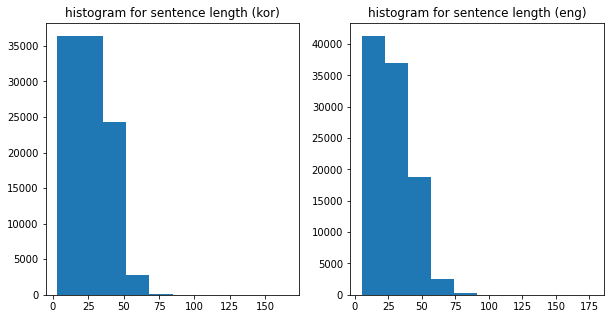

In [18]:
# 문장 길이에 대한 히스토그램

from matplotlib import pyplot as plt

len_kor = [len(i) for i in corpus_kor]
len_eng = [len(i) for i in corpus_eng]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(len_kor)
plt.title('histogram for sentence length (kor)')
plt.subplot(1,2,2)
plt.hist(len_eng)
plt.title('histogram for sentence length (eng)')
plt.show()

In [19]:
# 길이 40이하인 문장만 남긴다

corpus_crop_kor, corpus_crop_eng = list(), list()
for i in tqdm(range(len(corpus_kor))):
    if len(corpus_kor[i])<=40 and len(corpus_eng[i])<=40:
        corpus_crop_kor.append(corpus_kor[i])
        corpus_crop_eng.append(corpus_eng[i])

100%|██████████| 100000/100000 [00:00<00:00, 1320687.06it/s]


In [20]:
print(len(corpus_crop_kor), len(corpus_crop_eng))

76523 76523


In [21]:
import tensorflow as tf

def tokenize(corpus, max_words=10000):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [22]:
tensor_kor, tokenizer_kor = tokenize(corpus_crop_kor)

In [23]:
tensor_eng, tokenizer_eng = tokenize(corpus_crop_eng)

In [24]:
from sklearn.model_selection import train_test_split

train_src, test_src, train_tgt, test_tgt = train_test_split(tensor_kor, tensor_eng, test_size=0.2)

In [25]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

In [26]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units,
                                       return_sequences=True)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)
        
        return out

In [27]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)

        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        
        out, h_dec = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)

        return out, h_dec, attn

In [28]:
SRC_VOCAB_SIZE = len(tokenizer_kor.index_word) + 1
TGT_VOCAB_SIZE = len(tokenizer_eng.index_word) + 1

units         = 512
embedding_dim = 256

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

In [29]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

In [30]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss


In [31]:
@tf.function
def eval_step(src, tgt, encoder, decoder, dec_tok):
    bsz = src.shape[0]
    loss = 0

    enc_out = encoder(src)

    h_dec = enc_out[:, -1]
    
    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

    for t in range(1, tgt.shape[1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

        loss += loss_function(tgt[:, t], pred)
        dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))
    
    return batch_loss

In [32]:
ds_train = tf.data.Dataset.from_tensor_slices((train_src, train_tgt))
ds_test = tf.data.Dataset.from_tensor_slices((test_src, test_tgt))

In [33]:
import random

EPOCHS = 10
BATCH_SIZE=16


ds_train= ds_train.shuffle(buffer_size=10000, reshuffle_each_iteration=True).batch(BATCH_SIZE)
ds_test= ds_test.shuffle(buffer_size=10000, reshuffle_each_iteration=True).batch(BATCH_SIZE)


test_loss_dict = dict()

for epoch in range(EPOCHS):
    total_loss = 0
    
    with tqdm(enumerate(ds_train), total=len(ds_train)) as t:
        for (batch, (train_batch_src, train_batch_tgt)) in t:
            batch_loss = train_step(train_batch_src,
                                    train_batch_tgt,
                                    encoder,
                                    decoder,
                                    optimizer,
                                    tokenizer_eng)

            total_loss += batch_loss

            t.set_description_str('Epoch %2d' % (epoch + 1))
            t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))

    test_loss = 0
    

    with tqdm(enumerate(ds_test), total=len(ds_test)) as t:
        for (batch, (test_batch_src, test_batch_tgt)) in t:
            test_batch_loss = eval_step(test_batch_src,
                                        test_batch_tgt,
                                        encoder,
                                        decoder,
                                        tokenizer_eng)

            test_loss += test_batch_loss

            t.set_description_str('Test Epoch %2d' % (epoch + 1))
            t.set_postfix_str('Test Loss %.4f' % (test_loss.numpy() / (batch + 1)))

    test_loss_dict[epoch] = test_loss
    

Test Epoch 10: 100%|██████████| 957/957 [01:27<00:00, 10.93it/s, Test Loss 3.5553] 


In [64]:
import numpy as np

def evaluate(sentence, encoder, decoder):
    attention = np.zeros((train_tgt.shape[-1], train_src.shape[-1]))
    
    sentence = preprocess_sentence(sentence)
    inputs = tokenizer_kor.texts_to_sequences([sentence.split()])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=train_src.shape[-1],
                                                           padding='post')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([tokenizer_eng.word_index['<start>']], 0)

    for t in range(train_tgt.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()
        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += tokenizer_eng.index_word[predicted_id] + ' '

        if tokenizer_eng.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    # attention = attention[:len(result.split()), :len(sentence.split())]
    # plot_attention(attention, sentence.split(), result.split(' '))




In [65]:
translate("쉽고 간결하다.", encoder, decoder)

Input: 쉽고 간결하다 .
Predicted translation: , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , 


In [66]:
translate("일곱 명이 사망하였다.", encoder, decoder)

Input: 일곱 명이 사망하였다 .
Predicted translation: , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , 


In [67]:
translate("오바마는 대통령이다.", encoder, decoder)

Input: 오바마는 대통령이다 .
Predicted translation: , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , 


## 회고

- 메모리 할당 문제가 지속적으로 발생해서 데이터를 줄이거나 모델 크기를 줄이는 시도를 계속해야했다.
- 최종적으로 학습이 끝난 번역모델이 잘 작동하지 않았다.